In [7]:
### R script to analyze the first Pep30 library (also called N90) sequencing data

##### clear the workspace
rm(list = ls())  

# to adjust plots without generating all data, simply load the data
# load(file='Pep30.RData')

##### load packages
library(Peptides) # for calculating various physiochemical properties
library(vioplot) # violin plot
library(reshape)
library(ggplot2)
library(ppcor) # partial correlation

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:sm’:

    muscle




In [11]:

##### data preprocessing
# load raw counts data
# filter by total read counts
# assign reprotes/sequences to categories

# required files to run the script
raw_count_file='N90.all3.txt'
human_proteome='/home/xw2629/tfams/reference/human.CDS.fa-proteome.fa'

# output file name for processed file
processed_count_file='pep30.txt'

# parameters
min_total_count = 100
pseudo = 1

# this could take a while
if(! file.exists(processed_count_file)){
  
  # load a table with sequence and counts
  # ID      Seq     GFP_high        GFP_low Peptide
  d=read.table(raw_count_file,sep='\t',header=T)
  
  # filter sequences by total read counts
  
  d=d[(d$GFP_high+d$GFP_low)>min_total_count,]
  
  ##### calculate expression
  # add a pseudocount of 1 to all counts
  
  d$GFP_high = d$GFP_high + pseudo
  d$GFP_low = d$GFP_low + pseudo
  
  # expression = high/low
  d$expression = log2(d$GFP_high/d$GFP_low)
  #d$expression = d$GFP_high/(d$GFP_high + d$GFP_low)
  
  
  # calculate peptide tail length
  # remove the fist 5 residues from peptides, which are constant
  for (i in 1:nrow(d)){
    d$Peptide[i] = substr(d$Peptide[i],6,35)
  }
  
  # tail length
  d$tail_length = apply(as.matrix(d$Peptide),1,nchar)

  d$type="Other" # a small number of sequences like HA tag etc from the translation readthrough expression paper
  d$type[grep('intron',d$ID)]="Intron"
  d$type[grep('utr3',d$ID)]="3'UTR"
  d$type[grep('linc',d$ID)]="LncRNA"
  d$type[grep('cds',d$ID)]="CDS-frameshift"
  d$type[grep('utr5',d$ID)]="5'UTR"
  
  # determine if an internal peptide (cds) is inframe or not
  # if it can be found in the proteome, then it is inframe
  proteome=readChar(human_proteome, file.info(human_proteome)$size)
  for(i in 1:nrow(d)){
    #print(i)
    if(d$type[i] == 'CDS-frameshift'){
      if(length(grep(d$Peptide[i],proteome)) > 0){
        d$type[i] = 'CDS-inframe'
      }
    } else if(length(grep('^NM_',d$ID[i]))>0 & d$type[i]=="Other"){
      d$type[i] = "C-termini"
    }
  }
  write.table(d,'pep30.txt')
} else {
  d=read.table('pep30.txt')
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [12]:

##################################
# Fig 2b: violin plots of expression by tail length groups
######################################

pdf("fig2b.pdf",width=4,height=3)
par(las=1,mar=c(4,10,4,1))
vioplot(expression~tail_length,data=d,col=rgb(0.1,0.4,0.7,0.7),border=NA,axes=F,drawRect=F,xaxt='n',yaxt='n',xlab='Tail length (aa)\n',ylab='\nRelative expression')
axis(1,c(1,11,21,31),c(0,10,20,30))
axis(2,c(-10,-5,0,5,10),c(-10,-5,0,5,10))
dev.off()

PNG 
  2

In [13]:

############################
# Fig 2c: violin plots for expression by sequence type, i.e. intron, utr, etc
##############################

# a summary of counts
table(d$type)

# a subset, full length, 30aa
d2=d[d$tail_length==30 & d$type != "Other",]
write.table(d2[,5:6],'pep30-fulllen.txt',quote=F,row.names=F,col.names=F,sep='\t')
table(d2$type)

# reorder by median expression
types = sort(c("LncRNA","5' UTR","3' UTR","Intron","CDS-frameshift","CDS-inframe","C-termini"))
md <- c()
for (tp in types){
  md <- c(md, median(d2$expression[d2$type==tp]))
}
od <- order(md,decreasing=TRUE)
i=0
for (tp in types[od]){
  i=i+1
  d2$type[d2$type==tp] = paste(i,tp)
}
# plot
pdf("fig2c.pdf",width=4.2,height=3)
par(las=1,mar=c(5,9,1,1))
vioplot(expression~type,data=d2,horizontal = T,col=rgb(0.1,0.4,0.7,0.7),border=NA,xaxt='n',yaxt='n',axes=F,xlab='Relative expression\n(30-aa tail peptides)',ylab='')
axis(1)
#axis(2,1:7,paste(types[od],table(d2$type),sep=', n='),tick=F) # with number 
axis(2,1:7,types[od],tick=F)
abline(v=0,col="gray")
dev.off()



         3'UTR          5'UTR      C-termini CDS-frameshift    CDS-inframe 
          1752            858            871            645           1155 
        Intron         LncRNA          Other 
          4226            869             58 


         3'UTR          5'UTR      C-termini CDS-frameshift    CDS-inframe 
           645            302            869            237            894 
        Intron         LncRNA 
          1521            258 

PNG 
  2

In [14]:

###########################
# extended data fig. 2
###########################
###### find the best hydrohobicity scale: the one with the strongest correlation with expression
scales <- c("AbrahamLeo", "Argos", "BlackMould", "BullBreese", "Casari", "Chothia", "Cid", "Cowan3.4", "Cowan7.5", "Eisenberg", "Engelman", "Fasman", "Fauchere", "Goldsack", "Guy", "HoppWoods", "Janin", "Jones", "Juretic", "Kidera", "Kuhn", "KyteDoolittle", "Levitt", "Manavalan", "Miyazawa", "Parker", "Ponnuswamy", "Prabhakaran", "Rao", "Rose", "Roseman", "Sweet", "Tanford", "Welling", "Wilson", "Wolfenden", "Zimmerman", "interfaceScale_pH8", "interfaceScale_pH2", "octanolScale_pH8", "octanolScale_pH2", "oiScale_pH8",
            "oiScale_pH2")
hydro_s <- c() # pearson correlation coefficient

for(scale in scales){
  hydro_s <- c(hydro_s,abs(cor(d2$expression, hydrophobicity(d2$Peptide,scale),method='s')))
}

max(hydro_s)

best_scale = scales[order(hydro_s,decreasing=T)][1]
print(best_scale)

pdf("ext-fig2.pdf",width=4,height=6)
par(las=1,mar=c(5,9,1,1),cex=0.7)
#barplot(sort(hydro_p),horiz=TRUE,names.arg=scales[order(hydro_p)],xlab='Pearson correlation coefficient \n with expression')
barplot(sort(hydro_s),horiz=TRUE,
        names.arg=scales[order(hydro_s)],
        xlim=c(0,0.7),
        xlab='Spearman correlation coefficient \n with relative expression')
dev.off()

[1] 0.6734998

[1] "Miyazawa"


PNG 
  2

In [18]:

###############################
######### Fig. 2d: positional amino acid enrichment analysis with kpLogo
##############################

# left: hydrophobicity scale
dev.off()
pdf("fig2d-left.pdf",width=2,height=6)
par(las=1,cex=0.75)
aas ='ACDEFGHIKLMNPQRSTVWY'
aa_h = hydrophobicity(unlist(strsplit(aas,'')),best_scale)
barplot(sort(aa_h),xlab=paste("Hydrophobicity scale:",best_scale),horiz=T,border=NA,names.arg=unlist(strsplit(aas,''))[order(aa_h)],col=cm.colors(length(aa_h)+2))
dev.off()

# right: heatmap generated by kplogo
system('kpLogo pep30-fulllen.txt -k 1 -weighted -alphabet protein; mv kpLogo.pwm.txt pep30.kplogo.pwm.txt; rm kpLogo.* ')

pdf("fig2d-right.pdf",width=5,height=6)
pwm=read.table('pep30.kplogo.pwm.txt')
aas ='ACDEFGHIKLMNPQRSTVWY'
aa_h = hydrophobicity(unlist(strsplit(aas,'')),best_scale)
rownames(pwm) = unlist(strsplit(aas,''))
colnames(pwm) = -30:-1
pwm = pwm[order(aa_h),]
cap=5
pwm[pwm>cap]=cap
pwm[pwm< -cap]= -cap

aa = rownames(pwm)
pwm2 = melt(cbind(aa,pwm))
colnames(pwm2) = c("Amino acid ranked by hydrophobicity","Position relative to C-termini","Association \nw/ expression")
pwm2$`Amino acid ranked by hydrophobicity` = factor(pwm2$`Amino acid ranked by hydrophobicity`, levels = aa)

ggplot(pwm2, aes(`Position relative to C-termini`, `Amino acid ranked by hydrophobicity`, fill=`Association \nw/ expression` )) + 
  geom_tile()  +
  scale_fill_gradient2(low = "#075AFF",
                       mid = "white",
                       high = "#FF0000") +
  coord_fixed() +
  scale_x_discrete(breaks=seq(-30,-1,5))
dev.off()


null device 
          1

null device 
          1

Using aa as id variables



null device 
          1

In [19]:

###############################
### Fig. 2e
# scatter plot: hydrophobicity and expression
###############################################
dev.off()
pdf("fig2e.pdf",width=2.5,height=2.8)
par(mar=c(4,4,4,2),cex=0.75) # increase y-axis margin.
H=hydrophobicity(d2$Peptide,best_scale)
Rs=cor(H,d2$expression,method='s')
plot(H,d2$expression,
     pch=16,cex=0.2,
     bty='n',
     xlab='Average hydrophobicity\n',
     ylab='Relative expression')

legend('topright',paste('R=',round(Rs,digits=2),'\nN=',nrow(d2),sep=''),bty='n')
dev.off()

null device 
          1

null device 
          1

In [ ]:

################
# Fig. 2f
# correlation with several peptide features
################

In [26]:
# calculate disorder using iupred3. Need to modify the script to handle multiple sequences in a file
system("./cal_disorder.sh")

x=read.table('N90.30aa.disorder.txt')
disorder_30aa <- c()
for (i in 1:nrow(x)){
  disorder_30aa[x[i,1]] = x[i,2]
}
Intrinsic_disorder=rep(NA,nrow(d2))
for (i in 1:nrow(d2)){
  Intrinsic_disorder[i] = disorder_30aa[d2$Peptide[i]]
}
cor(Intrinsic_disorder,d2$expression,method='s')

# a strong negative correlation between hydrophobicity and disorder
Average_hydrophobicity=hydrophobicity(d2$Peptide,best_scale)
cor(Intrinsic_disorder,Average_hydrophobicity,method='s')

[1] 0.6456742

[1] -0.925666

[1] -0.2792078

[1] -0.3177348

[1] 0.4240164

null device 
          1

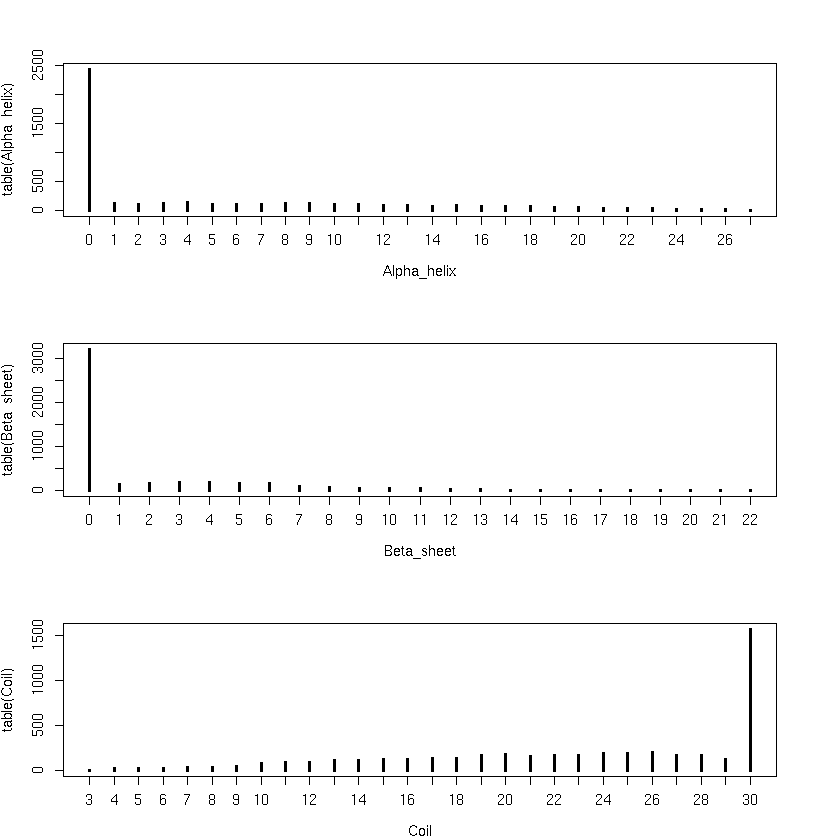

In [27]:
##### protein secondary structure prediction using s4pred: takes a long time
# need to install s4pred
# see script secondary_structure_pred.sh

s4pred='Pep30.30aa.secondary.structure.txt'

# parse the data: number of aa in coil, a-helix or b-sheet
structure_pred<-function(struct){
  # struct="CCCCCCCCHHCCCCCCCCCCCCCCCCCCCC"
  a=strsplit(struct,split='')
  Coil=sum(a[[1]]=="C")
  Alpha_helix=sum(a[[1]]=="H")
  Beta_sheet=sum(a[[1]]=="E")
  return(c(Alpha_helix,Beta_sheet,Coil))
}
# load the structure prediction
# SHGFPPEVEEQDDGALPMSCAQESGMDRHP  CCCCCCCCCEEEHHHHCCCCHHHHHHHHCC
x=read.table(s4pred)
structure30 <- c()
for (i in 1:nrow(x)){
  structure30[x[i,1]] = x[i,2]
}
Alpha_helix=rep(NA,nrow(d2))
Beta_sheet=rep(NA,nrow(d2))
Coil=rep(NA,nrow(d2))
for (i in 1:nrow(d2)){
  tmp = structure_pred(structure30[d2$Peptide[i]])
  Alpha_helix[i] = tmp[1]
  Beta_sheet[i] = tmp[2]
  Coil[i] = tmp[3]
}
cor(Alpha_helix,d2$expression,method='s')
cor(Beta_sheet,d2$expression,method='s')
cor(Coil,d2$expression,method='s')

# visualize the distribution
dev.off()
par(mfrow=c(3,1),mar=c(4,4,4,4))
plot(table(Alpha_helix))
plot(table(Beta_sheet))
plot(table(Coil))


In [29]:

# amino acid composition: counts for different types of aa
# https://rdrr.io/cran/Peptides/man/aaComp.html
aacomp = aaComp(d2$Peptide)
Tiny.AA.count <- c() # (A + C + G + S + T)
Small.AA.count <- c() # (A + B + C + D + G + N + P + S + T + V)
Aliphatic.AA.count <- c() #  (A + I + L + V)
Aromatic.AA.count <- c() # (F + H + W + Y)
NonPolar.AA.count <- c() #  (A + C + F + G + I + L + M + P + V + W + Y)
Polar.AA.count <- c() #  (D + E + H + K + N + Q + R + S + T + Z)
Charged.AA.count <- c() # (B + D + E + H + K + R + Z)
Basic.AA.count <- c() #  (H + K + R)
Acidic.AA.count <- c() #  (B + D + E + Z)
for(i in 1:nrow(d2)){
  Tiny.AA.count <- c(Tiny.AA.count,unlist(aacomp[i])[1])
  Small.AA.count <- c(Small.AA.count,unlist(aacomp[i])[2])
  Aliphatic.AA.count <- c(Aliphatic.AA.count,unlist(aacomp[i])[3])
  Aromatic.AA.count <- c(Aromatic.AA.count,unlist(aacomp[i])[4])
  NonPolar.AA.count <- c(NonPolar.AA.count,unlist(aacomp[i])[5])
  Polar.AA.count <- c(Polar.AA.count,unlist(aacomp[i])[6])
  Charged.AA.count <- c(Charged.AA.count,unlist(aacomp[i])[7])
  Basic.AA.count <- c(Basic.AA.count,unlist(aacomp[i])[8])
  Acidic.AA.count <- c(Acidic.AA.count,unlist(aacomp[i])[9])
}

# other physico-chem properties
Net_charge = charge(d2$Peptide)
Molecular_weight = mw(d2$Peptide)
Mass_to_charge_ratio = mz(d2$Peptide)
pI_isoelectic_point = pI(d2$Peptide)
Aliphatic_index = aIndex(d2$Peptide)
Interaction_potential = boman(d2$Peptide)
Hydrophobic_moment = hmoment(d2$Peptide)
Instability_index = instaIndex(d2$Peptide)

# membrane prediction
# https://rdrr.io/cran/Peptides/man/membpos.html
membrane_pred<-function(seq){
  a=membpos(seq)
  b=sum(a[[1]]$MembPos=="Transmembrane")
  c=sum(a[[1]]$MembPos=="Surface")
  d=sum(a[[1]]$MembPos=="Globular")
  return(c(b,c,d))
}
Transmembrane_potential = rep(0,nrow(d2))
Surface_potential = rep(0,nrow(d2))
Globular_potential = rep(0,nrow(d2))

for(i in 1:nrow(d2)){
  #print(i)
  a=membrane_pred(d2$Peptide[i])
  Transmembrane_potential[i] = a[1]
  Surface_potential[i] = a[2]
  Globular_potential[i] = a[3]
}


In [30]:

# C-degron: a regression model based on A/G/R at the last 10 residues
nPos = 10
degrons = c("A","G","R")
C_degron = data.frame(matrix(nrow=nrow(d2),ncol=nPos*length(degrons)))
for(i in 1:nrow(d2)){
  AAs=strsplit(d2$Peptide[i],split='')[[1]][(30-nPos+1):30]
  j=0
  for(aa in degrons){
    for(pos in 1:nPos){
      j=j+1
      C_degron[i,j] = AAs[pos]==aa
    }
  }
}
C_degron$expression = d2$expression
Cm = lm(expression~., data=C_degron)
C_degron_prediction = Cm$fitted.values
cor(C_degron_prediction,d2$expression,method='s')


[1] 0.2304209

In [31]:

## Fig. 2f: correlation and partial correlation
features = cbind(Average_hydrophobicity,Hydrophobic_moment,Transmembrane_potential,Molecular_weight,Net_charge,Mass_to_charge_ratio,C_degron_prediction,Instability_index,Intrinsic_disorder,Coil,Alpha_helix,Beta_sheet,Interaction_potential,Aliphatic.AA.count,Aromatic.AA.count,Basic.AA.count,Charged.AA.count,Small.AA.count,Acidic.AA.count,Polar.AA.count)

prs = c()
crs = c()
for (i in 1:ncol(features)){
  crs = c(crs,cor(d2$expression,features[,i],method='s'))
  prs = c(prs, pcor(cbind(d2$expression,Average_hydrophobicity,features[,i]),method='s')$estimate[3,1])
}

dev.off()
pdf("fig2f.pdf",width=4,height=5)
par(las=1) # make label text perpendicular to axis
par(mar=c(5,11,1,1)) # increase y-axis margin.
barplot(rbind(rev(prs),rev(crs)),beside=T,names.arg=rev(colnames(features)),horiz=T,xlab='Correlation coefficient\n with expression')
dev.off()



Warning message in pcor(cbind(d2$expression, Average_hydrophobicity, features[, :
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”
Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”


null device 
          1

null device 
          1

In [32]:

save.image(file='fig2.RData')
#load(file='fig2.RData')